# LogisticRegression 

We'll start by generating data from two separate two-dimensional normal distributions.
So, we're dealing here with a setting where we have two predictors, x1 and x2.
Our goal is to simulate data from two normal distributions.

In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)# (h"mean", standard deviation, size)
    y1 = ss.norm.rvs(0, sd1, n)
    x2 = ss.norm.rvs(h, sd2, n) # h is distance from the origin.
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1, y1, x2, y2)

(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

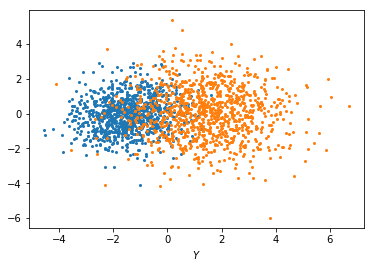

In [4]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms = 2)
    plt.plot(x2, y2, "o", ms = 2)
    plt.xlabel("$X$")
    plt.xlabel("$Y$")
plot_data(x1, y1, x2, y2)    

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

When we stack **x and y** we get two rows and 1,000 columns.
But instead, we want the transpose of this**T**.


In [6]:
X = np.vstack((np.vstack((x1,y1)).T , np.vstack((x2,y2)).T))

In [7]:
X.shape

(2000, 2)

We need to generate the outcome vector y. Use the np.repeat function.
So we have n observations coming from class 1 and we have the same number of observations coming from class 2.


In [8]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))

In [9]:
y.shape

(2000,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state=1)

/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
clf.fit(X_train, y_train)

/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

out what is the score in other words, how well does the classifier perform.

In [12]:
clf.score(X_test,y_test)

0.88

We have two classes, class 1 and class 2.
The output is is a 0.97 probability that this particular test
point belongs to class 1,And there is a 0.02  probability that it belongs to class 2, these two probabilities, of course, have to add up to 1.

In [13]:
clf.predict_proba(np.array([-2, 0]).reshape(1,-1))

array([[0.96943191, 0.03056809]])

In [14]:
clf.predict(np.array([-2, 0]).reshape(1,-1))

array([1])

In [15]:
def plot_probs(ax, clf, class_no):
    #we use the meshgrid for creating two matrix and to specify the range of values from minus 5 to plus 5
    #in increments of 0.1, and we do the same for the second variable x2.
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    # use ravel to turn matrix matrix to vector, and then stack the two new vector together, then we "predict_proba" of the points
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    #take pro of one class 
    Z = probs[:,class_no]
    # we want to plot these on an x1, x2 plane, and z is going to be a long column vector.
    #We therefore use the reshape function, which takes z and turns it into the shape of xx1.
    Z = Z.reshape(xx1.shape)
    #the contourf function  plot the value of z at locations that are specified by xx1 and xx2.
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

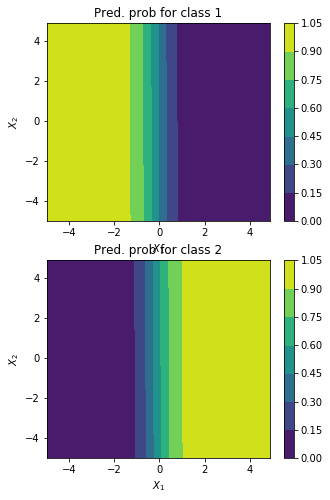

In [16]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");

We want to compute probabilitiesat for every point of the x1-x2 grid.

The first output matrix is going to give us the x1 coordinate at all of these grid points, and the second one is going to give us the x2 coordinate at the same grid points.

In [24]:
xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    # use ravel to turn matrix matrix to vector, and then stack the two new vector together, then we "predict_proba" of the points
probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))

    

array([9.99866114e-01, 1.33886346e-04])

In this case, where the training data in each class are generated from bivariate Gaussian distributions, it turns out that a linear decision boundary is the best one can do.

If we had more than two Gaussian distributions generating the data, then the optimal decision boundary would be non-linear and generally, a linear model would usually not do a good job.


# Random forest
is a powerful method for regression and classification.

The random forest method makes use of several trees when making its prediction, and since in graph theory, a collection of trees is called a forest, in other words, to make a prediction, the random forest considers the predictions of several trees.
It would not, however, be useful to have many identical trees because all these trees would presumably give you the same prediction, this is why the trees in the forest are randomized.

Tree-based methods can be used for regression and classification, these methods involve dividing the predictor space
into simpler regions using straight lines,so we first take the entire predictor space and divide it into two regions.
We now in turn look at each of these two smaller regions, divide them into yet smaller regions, and so on,
continuing until we hit some stopping criteria.

So the way we divide the predictor space into smaller regions is recursive in nature,to make a prediction for a previously unseen test observation, we find the region of the predictor space where the test observation falls.
In the **regression** setting, we return the **mean** of the outcomes of the training observations in that particular region, whereas in a **classification** setting we return the **mode**, the most common element of the outcomes of the training observations in that region.

When we use lines to divide the predictor space into regions, these lines must be aligned with the directions
of the axes of the predictor space, and because of this constraint, we can summarize the splitting rules
in a tree.

This is also why these methods are known as decision tree methods.
In higher dimensions, these lines become planes,so we end up dividing the predictor space into high-dimensional rectangles or boxes.

How do we decide where to make these cuts? The basic idea is that we'd like to carve out regions in the predictor space that are maximally homogeneous in terms of their outcomes.
Remember, we'll ultimately use the mean or the mode of the outcomes falling in a given region as our predicted outcome for an unseen observation, so we can minimize error by finding maximally homogeneous regions in the predictor space.
Whenever we make a split, we consider all predictors from x1 to xp, and for each predictor, we consider all possible cut points.
We choose the predictor - cut point combination such that the resulting division of the predictor space has the lowest value of some criterion, usually called a loss function, that we're trying to minimize.
In **regression**, this loss function is usually **RSS**, the residual sum of squares.
In **classification**, two measures are commonly used, called the **Gini index** and the **cross-entropy**, the basic idea is, again, to make cuts using a predictor cut point combination that makes the classes within each region
as homogeneous as possible.

**Bagging**, in the context of decision trees, means that we draw a number of bootstrap datasets and fit each to a tree.rest

Let's consider a simple example, We start from some dataset having 1,000 observations, and we have 9 predictors from x1 through x9.
We want to build, say, 50 trees, so let's randomize the data first, We first draw 50 bootstrap samples from the original data and dedicate a separate tree for each dataset. We then fit the trees one by one.
Starting from the first tree and the first cut, we first determine which predictors to use.
If we're allowed to use, say, three predictors when making a cut, we might be allowed to use x3, x7, and, say, x8 for the first cut.
We make the best cut we can given the data and these three predictors, and we then move the second cut in the first tree.
This time we might be allowed to use predictors x1, x5, and x7. And again, we find the best cut.We proceed until we fit the first three, meaning until we fit whatever stopping criterion we have, We then continue the same way until we get all of the trees in the forest.

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier